In [2]:
# Nate Moser
# nmm131@pitt.edu

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nfl_data_py as nfl

2024 done.
Downcasting floats.


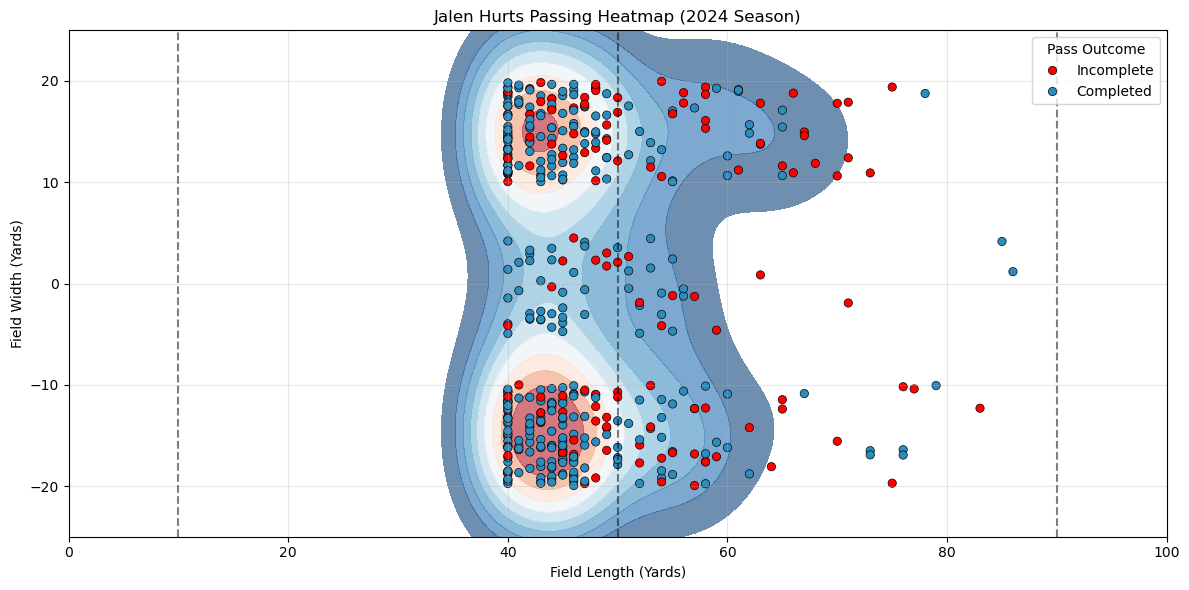

In [4]:
# Load 2024 play-by-play data
pbp = nfl.import_pbp_data([2024])

# Filter to Jalen Hurts' passing plays
hurts_passes = pbp[
    (pbp['pass_attempt'] == 1) &
    (pbp['passer'] == 'J.Hurts') &
    (pbp['air_yards'].notna())
].copy()

# Map pass_location (left/middle/right) to field width (Y coordinate)
def map_location(loc):
    if loc == "left":
        return -15 + np.random.uniform(-5, 5)
    elif loc == "right":
        return 15 + np.random.uniform(-5, 5)
    else:
        return np.random.uniform(-5, 5)

hurts_passes["Y"] = hurts_passes["pass_location"].map(map_location)

# Air yards = forward pass (X coordinate)
hurts_passes["X"] = hurts_passes["air_yards"].clip(lower=0, upper=60) + 40  # Offset to start around midfield

# Label completions
hurts_passes["Completion"] = hurts_passes["complete_pass"].map({1: "Completed", 0: "Incomplete"})

# Plotting
plt.figure(figsize=(12, 6))
sns.kdeplot(
    x=hurts_passes["X"], y=hurts_passes["Y"],
    cmap="RdBu_r", fill=True, alpha=0.6, thresh=0.1
)

sns.scatterplot(
    x=hurts_passes["X"], y=hurts_passes["Y"],
    hue=hurts_passes["Completion"],
    palette={"Completed": "#2b8cbe", "Incomplete": "red"},
    edgecolor="black", legend=True
)

plt.xlim(0, 100)
plt.ylim(-25, 25)
plt.axvline(10, color='black', linestyle='--', alpha=0.5)
plt.axvline(50, color='black', linestyle='--', alpha=0.5)
plt.axvline(90, color='black', linestyle='--', alpha=0.5)

plt.title("Jalen Hurts Passing Heatmap (2024 Season)")
plt.xlabel("Field Length (Yards)")
plt.ylabel("Field Width (Yards)")
plt.legend(title="Pass Outcome")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("jalen_hurts_passing_heatmap_2024.png", dpi=300)
plt.show()

2024 done.
Downcasting floats.


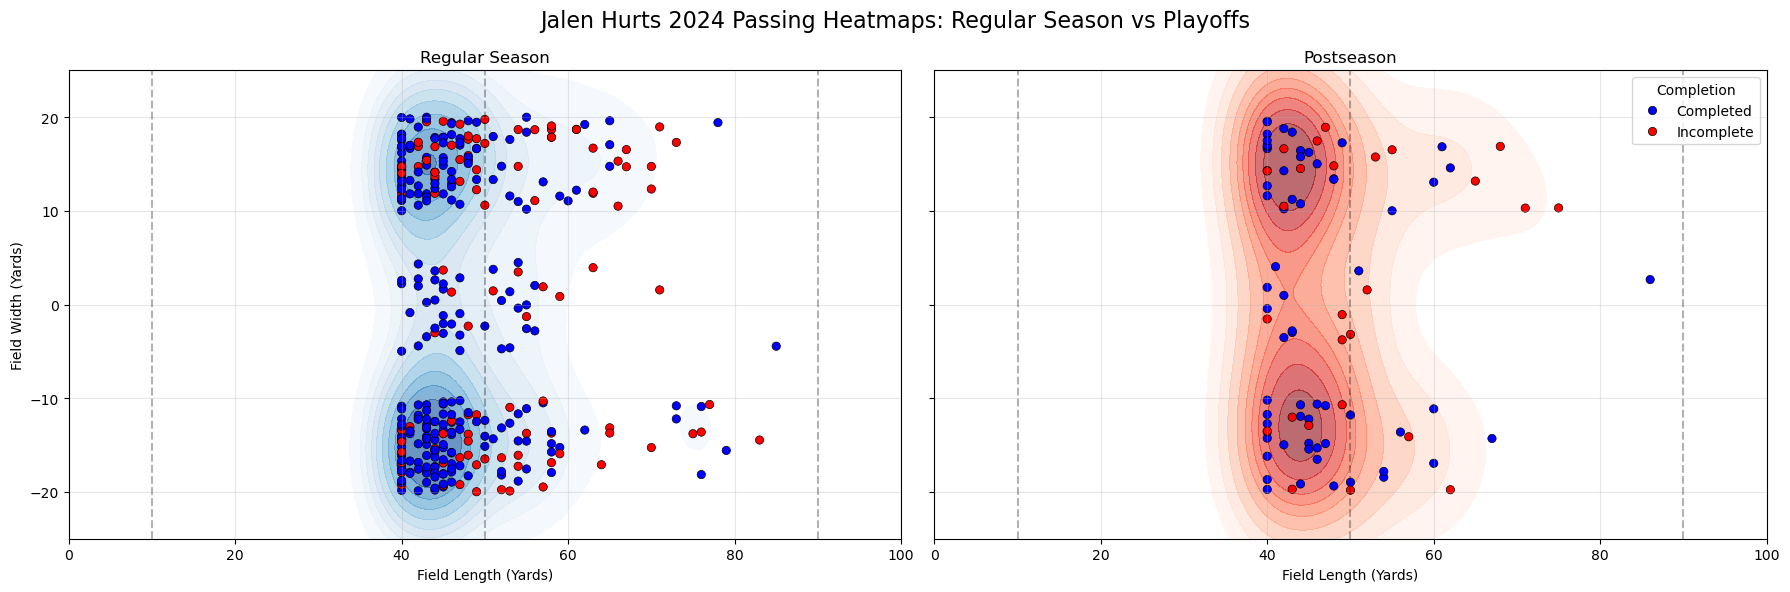

In [5]:
# Load real 2024 play-by-play data
df = nfl.import_pbp_data([2024])

# Filter to Hurts' passes
hurts_passes = df[
    (df['pass_attempt'] == 1) &
    (df['passer'] == 'J.Hurts') &
    (df['air_yards'].notna())
].copy()

# Add field Y-coordinate based on pass location
def map_location(loc):
    if loc == "left":
        return -15 + np.random.uniform(-5, 5)
    elif loc == "right":
        return 15 + np.random.uniform(-5, 5)
    else:
        return np.random.uniform(-5, 5)

hurts_passes["Y"] = hurts_passes["pass_location"].map(map_location)
hurts_passes["X"] = hurts_passes["air_yards"].clip(lower=0, upper=60) + 40
hurts_passes["Completion"] = hurts_passes["complete_pass"].map({1: "Completed", 0: "Incomplete"})

# Split by season type
reg = hurts_passes[hurts_passes["season_type"] == "REG"]
post = hurts_passes[hurts_passes["season_type"] == "POST"]

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Regular season heatmap
sns.kdeplot(
    x=reg["X"], y=reg["Y"], cmap="Blues", fill=True, ax=axes[0], alpha=0.6, thresh=0.1
)
sns.scatterplot(
    x=reg["X"], y=reg["Y"], hue=reg["Completion"],
    palette={"Completed": "blue", "Incomplete": "red"},
    edgecolor="black", ax=axes[0], legend=False
)
axes[0].set_title("Regular Season")

# Playoff heatmap
sns.kdeplot(
    x=post["X"], y=post["Y"], cmap="Reds", fill=True, ax=axes[1], alpha=0.6, thresh=0.1
)
sns.scatterplot(
    x=post["X"], y=post["Y"], hue=post["Completion"],
    palette={"Completed": "blue", "Incomplete": "red"},
    edgecolor="black", ax=axes[1], legend=True
)
axes[1].set_title("Postseason")

# Shared field styling
for ax in axes:
    ax.set_xlim(0, 100)
    ax.set_ylim(-25, 25)
    ax.set_xlabel("Field Length (Yards)")
    ax.set_ylabel("Field Width (Yards)")
    ax.grid(alpha=0.3)
    ax.axvline(10, color='black', linestyle='--', alpha=0.3)
    ax.axvline(50, color='black', linestyle='--', alpha=0.3)
    ax.axvline(90, color='black', linestyle='--', alpha=0.3)

plt.suptitle("Jalen Hurts 2024 Passing Heatmaps: Regular Season vs Playoffs", fontsize=16)
plt.tight_layout()
plt.savefig("jalen_hurts_2024_side_by_side_heatmap.png", dpi=300)
plt.show()

2024 done.
Downcasting floats.


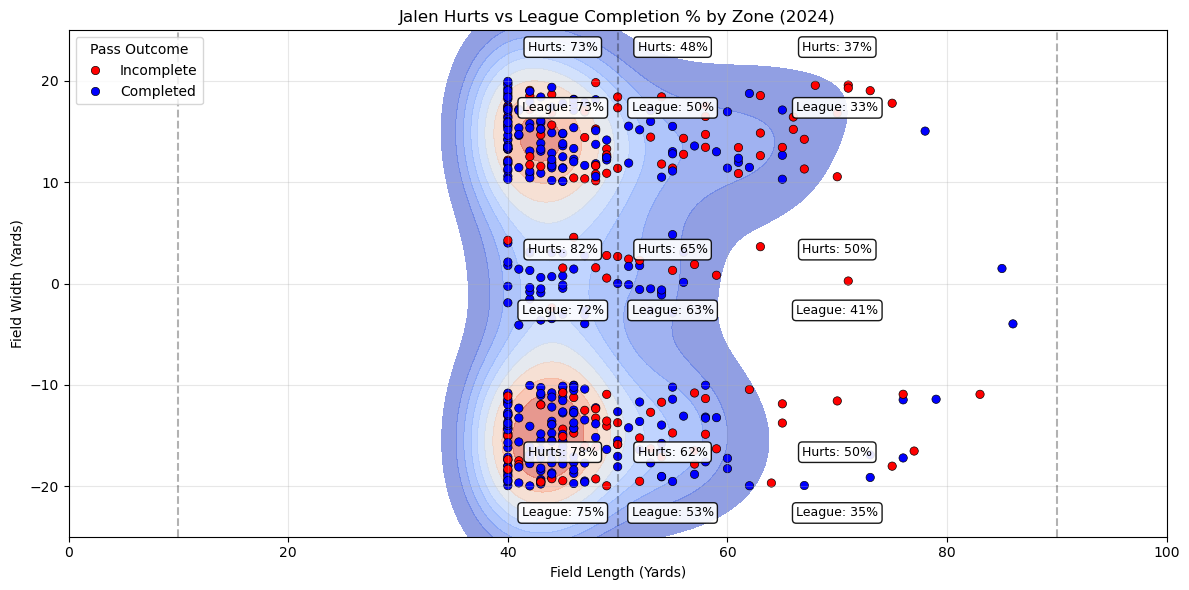

In [6]:
# Load real 2024 play-by-play data
df = nfl.import_pbp_data([2024])

# Filter to Hurts' passes
hurts_passes = df[
    (df['pass_attempt'] == 1) &
    (df['passer'] == 'J.Hurts') &
    (df['air_yards'].notna())
].copy()

# Estimate Y coordinate based on pass location
def map_location(loc):
    if loc == "left":
        return -15 + np.random.uniform(-5, 5)
    elif loc == "right":
        return 15 + np.random.uniform(-5, 5)
    else:
        return np.random.uniform(-5, 5)

hurts_passes["Y"] = hurts_passes["pass_location"].map(map_location)
hurts_passes["X"] = hurts_passes["air_yards"].clip(lower=0, upper=60) + 40
hurts_passes["Completion"] = hurts_passes["complete_pass"].map({1: "Completed", 0: "Incomplete"})

# Define zone label function
def get_zone(x, y):
    if x < 10:
        depth = "Short"
    elif x < 20:
        depth = "Medium"
    else:
        depth = "Deep"

    if y < -10:
        side = "Left"
    elif y > 10:
        side = "Right"
    else:
        side = "Middle"

    return f"{depth}-{side}"

# Assign zone to Hurts passes
hurts_passes["zone"] = hurts_passes.apply(lambda row: get_zone(row["air_yards"], row["Y"]), axis=1)

# Get league-wide zone stats
league_passes = df[(df['pass_attempt'] == 1) & (df['air_yards'].notna())].copy()
league_passes["Y"] = league_passes["pass_location"].map(map_location)
league_passes["zone"] = league_passes.apply(lambda row: get_zone(row["air_yards"], row["Y"]), axis=1)

league_zone_stats = league_passes.groupby("zone")["complete_pass"].mean().reset_index()
league_zone_stats.columns = ["zone", "league_completion_pct"]

# Hurts zone completion
hurts_zone_stats = hurts_passes.groupby("zone")["complete_pass"].mean().reset_index()
hurts_zone_stats.columns = ["zone", "hurts_completion_pct"]

# Merge for comparison
zone_compare = pd.merge(hurts_zone_stats, league_zone_stats, on="zone")
zone_compare["diff"] = zone_compare["hurts_completion_pct"] - zone_compare["league_completion_pct"]

# Plot heatmap with Hurts' zone % and league diff
fig, ax = plt.subplots(figsize=(12, 6))

sns.kdeplot(
    x=hurts_passes["X"], y=hurts_passes["Y"], cmap="coolwarm", fill=True, alpha=0.6, thresh=0.1, ax=ax
)
sns.scatterplot(
    x=hurts_passes["X"], y=hurts_passes["Y"], hue=hurts_passes["Completion"],
    palette={"Completed": "blue", "Incomplete": "red"}, edgecolor="black", ax=ax
)

zone_coords = {
    "Short-Left": (45, -20),
    "Short-Middle": (45, 0),
    "Short-Right": (45, 20),
    "Medium-Left": (55, -20),
    "Medium-Middle": (55, 0),
    "Medium-Right": (55, 20),
    "Deep-Left": (70, -20),
    "Deep-Middle": (70, 0),
    "Deep-Right": (70, 20),
}

for _, row in zone_compare.iterrows():
    zone = row["zone"]
    hurts_pct = row["hurts_completion_pct"]
    league_pct = row["league_completion_pct"]
    diff = row["diff"]
    if zone in zone_coords:
        x, y = zone_coords[zone]
        ax.text(x, y+3, f"Hurts: {hurts_pct:.0%}", fontsize=9, ha='center',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.9))
        ax.text(x, y-3, f"League: {league_pct:.0%}", fontsize=9, ha='center',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.9))

ax.set_xlim(0, 100)
ax.set_ylim(-25, 25)
ax.set_xlabel("Field Length (Yards)")
ax.set_ylabel("Field Width (Yards)")
ax.grid(alpha=0.3)
ax.axvline(10, color='black', linestyle='--', alpha=0.3)
ax.axvline(50, color='black', linestyle='--', alpha=0.3)
ax.axvline(90, color='black', linestyle='--', alpha=0.3)

ax.set_title("Jalen Hurts vs League Completion % by Zone (2024)")
ax.legend(title="Pass Outcome", loc='upper left')
plt.tight_layout()
plt.savefig("jalen_hurts_vs_league_zone_comparison.png", dpi=300)
plt.show()

In [7]:
# Save filtered and processed Jalen Hurts pass data
hurts_passes.to_csv("jalen_hurts_2024_passes.csv", index=False)